## Name:- Darpan Gaur
## Roll Number :- CO21BTECH11004

# **Quiz: Accuracy and Stability Analysis for FDM**

## **Instructions:**
- This quiz contains **four numerical experiments** to analyze **accuracy and stability** in different PDEs.
- Complete the missing parts of each Python script.
- Compare **explicit and implicit** methods, and discuss accuracy vs stability.
- Use **plots** to visualize the results.

## **1. Heat Conduction in a Rod (Parabolic PDE)**
**Equation:**
$$
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
$$
**Task:** Implement explicit and implicit finite difference methods.

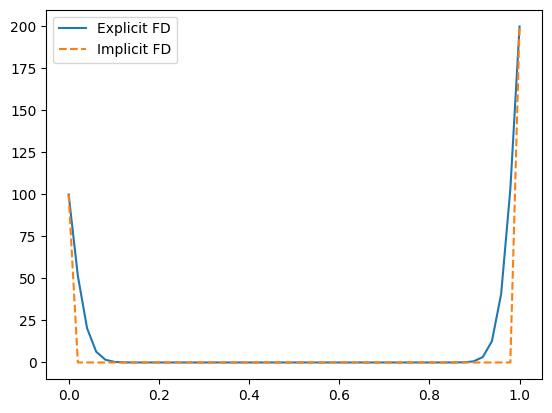

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parameters
L = 1.0
Nx = 50
dx = L / (Nx - 1)
dt = 0.0005  # Adjust for stability check
alpha = 0.01
time_steps = 100

# Initial and boundary conditions
T = np.zeros(Nx)
T[0], T[-1] = 100, 200  # Fixed temperature at boundaries

def explicit_fd(T, alpha, dx, dt, time_steps):
    for _ in range(time_steps):
        T_new = np.copy(T)
        for i in range(1, Nx - 1):
            T_new[i] = T[i] + (alpha * dt / dx**2) * (T[i+1] - 2*T[i] + T[i-1])
        T = np.copy(T_new)
    return T

# Implement the implicit method using a tridiagonal solver
def implicit_fd(T, alpha, dx, dt, time_steps):
    for _ in range(time_steps):
        A = np.zeros((3, Nx))  # Tridiagonal matrix setup
        b = np.copy(T)

        for i in range(1, Nx - 1):
            A[1, i] = 1 + 2 * (alpha * dt / dx**2)
            A[0, i] = - (alpha * dt / dx**2)
            A[2, i] = - (alpha * dt / dx**2)
        
        A[1, 0] = A[1, -1] = 1
        b[0], b[-1] = 100, 200

        T = solve_banded((1,1), A, b)

    return T

T_explicit = explicit_fd(T.copy(), alpha, dx, dt, time_steps)
T_implicit = implicit_fd(T.copy(), alpha, dx, dt, time_steps)

plt.plot(np.linspace(0, L, Nx), T_explicit, label='Explicit FD')
plt.plot(np.linspace(0, L, Nx), T_implicit, label='Implicit FD', linestyle='dashed')
plt.legend()
plt.show()

## **2. Wave Equation (Hyperbolic PDE)**
**Equation:**
$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$
**Task:** Implement central difference scheme ensuring CFL stability.

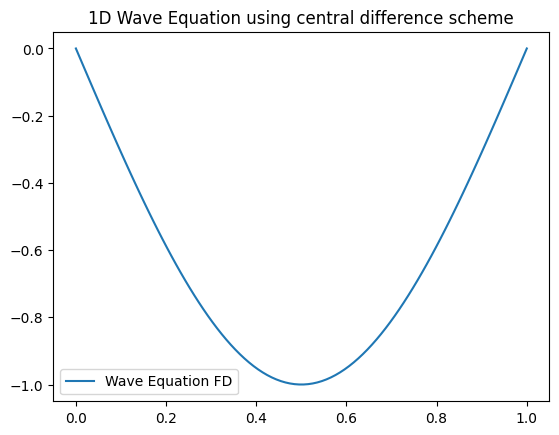

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0
Nx = 100
dx = L / (Nx - 1)
dt = 0.005
c = 1.0
time_steps = 200

# Initial conditions
u = np.sin(np.pi * np.linspace(0, L, Nx))
u_prev = np.copy(u)  # u at t-1
u_next = np.copy(u)  # u at t+1

def wave_equation_fd(u, u_prev, c, dx, dt, time_steps):
    for _ in range(time_steps):
        for i in range(1, Nx - 1):
            # Students: Complete the central difference scheme
            u_next[i] = 2 * u[i] - u_prev[i] + (c * dt / dx)**2 * (u[i+1] - 2*u[i] + u[i-1])
        
        u_prev, u = np.copy(u), np.copy(u_next)

        # Boundary conditions
        u[0] = 0.0
        u[-1] = 0.0
    return u

u_final = wave_equation_fd(u.copy(), u_prev.copy(), c, dx, dt, time_steps)

plt.plot(np.linspace(0, L, Nx), u_final, label='Wave Equation FD')
plt.title('1D Wave Equation using central difference scheme') 
plt.legend()
plt.show()

- Here for CFL stability, $c \frac{\Delta t}{\Delta x} \leq 1$.
- For the given parameters, $c = 1$, $\Delta x = \frac{1}{100}$, and $\Delta t = \frac{1}{200}$.
- $c \frac{\Delta t}{\Delta x} = 1 \times \frac{1}{200} \times 100 = 0.5$ 
- So, the CFL condition is satisfied.

## **Question 3: Cahn-Hilliard Phase Separation (Fourth-Order PDE)**

**Equation:**
$$
\frac{\partial c}{\partial t} = M \nabla^2 \left( f'(c) - \kappa \nabla^2 c \right)
$$
where:
- $ f(c) = A c^2 (1-c)^2 $ is the double-well potential.
- $ M $ is the mobility.
- $ \kappa $ is the gradient energy coefficient.

**Task:**
- Implement explicit finite difference time stepping.
- Compare results for different time step sizes.


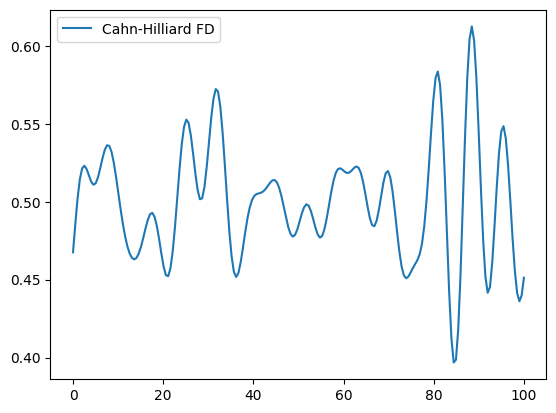

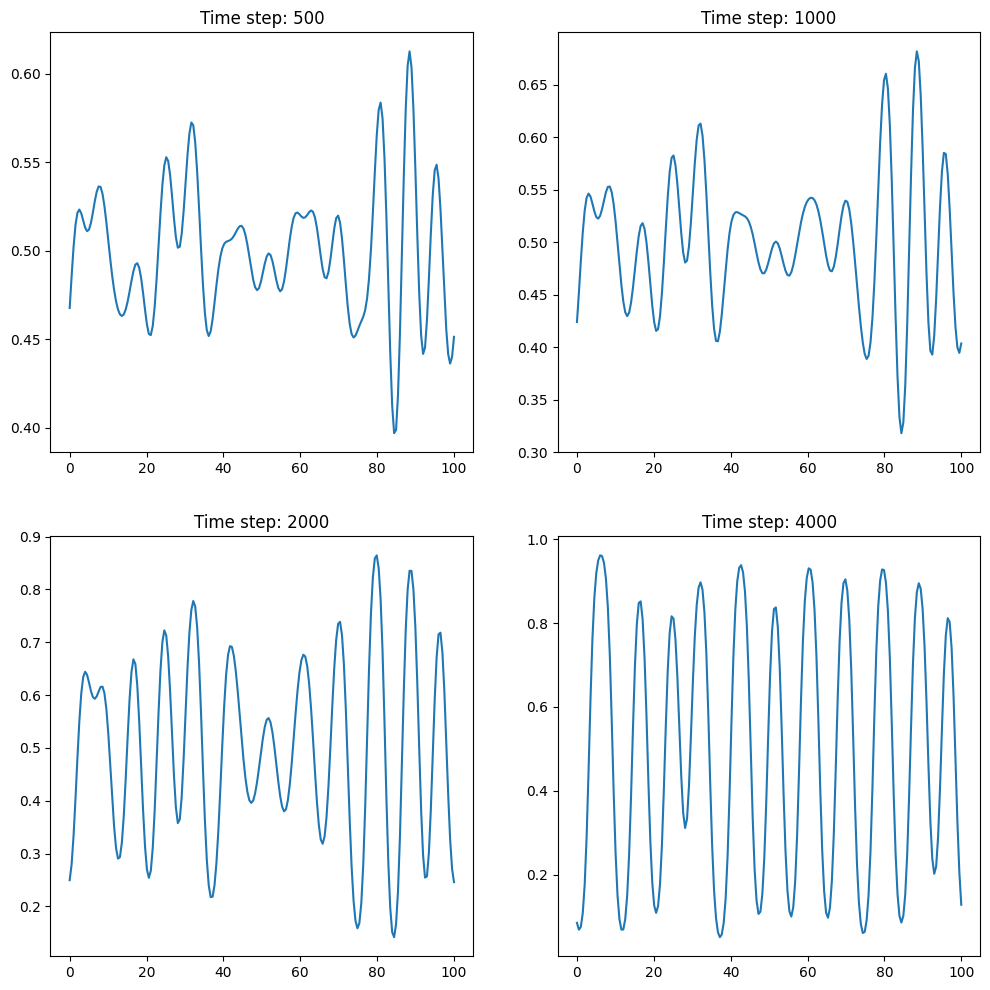

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100
Nx = 200
dx = L / Nx
dt = 0.007
M, kappa, A = 1.0, 1.0, 1.0
time_steps = 500

# Initial random condition
c = np.random.uniform(0.4, 0.6, Nx)

def laplacian(u):
    return (np.roll(u, -1) - 2*u + np.roll(u, 1)) / dx**2

def cahn_hilliard_fd(c, M, kappa, A, dx, dt, time_steps):
    for _ in range(time_steps):
        # Compute chemical potential
        mu = A * (2*c*(1-c)*(1-2*c)) - kappa * laplacian(c)
        # Students: Complete the update equation using explicit scheme
        c += dt * M * laplacian(mu)
    return c

c_final = cahn_hilliard_fd(c.copy(), M, kappa, A, dx, dt, time_steps)

plt.plot(np.linspace(0, L, Nx), c_final, label='Cahn-Hilliard FD')
plt.legend()
plt.show()

# make a 2x2 plot of c_final for 4 time steps - 500, 1000, 2000, 4000
time_steps = [500, 1000, 2000, 4000]
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    c_final = cahn_hilliard_fd(c.copy(), M, kappa, A, dx, dt, time_steps[i])
    ax.plot(np.linspace(0, L, Nx), c_final)
    ax.set_title(f'Time step: {time_steps[i]}')

plt.show()


- For given $dt = 0.01$, the explicit method is unstable.
- For $dt = 0.007$, the explicit method is stable.
- Plotting results for time steps : 500, 1000, 2000, 4000.

## **Question 4: Navier-Stokes Flow Over a Cylinder (Stability Test)**

**Equation:**
$$
\frac{\partial \mathbf{u}}{\partial t} + (\mathbf{u} \cdot \nabla) \mathbf{u} = -\frac{1}{\rho} \nabla p + \nu \nabla^2 \mathbf{u}
$$

**Task:**
- Implement a simple forward step in time for Navier-Stokes.
- Observe stability vs CFL condition.

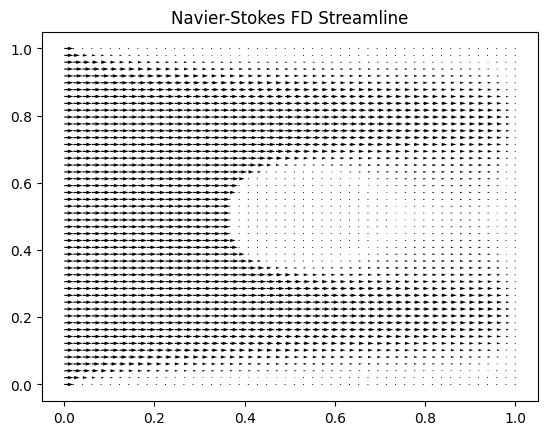

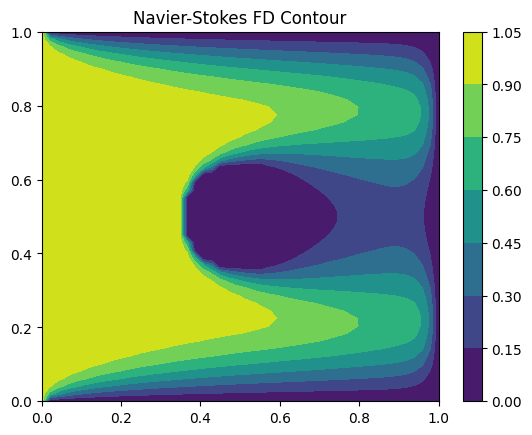

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Nx, Ny = 50, 50
dx, dy = 1.0 / Nx, 1.0 / Ny
dt = 0.005  # Adjust this for stability
nu = 0.01  # Viscosity
time_steps = 5000

# make  grid
X, Y = np.meshgrid(np.linspace(0, 1.0, Nx), np.linspace(0, 1.0, Ny))

# Velocity field
u = np.zeros((Nx, Ny))
v = np.zeros((Nx, Ny))

# stability condition -> approximation (similar to heat equation)
if (nu * dt / min(dx**2, dy**2)) > 0.5:
    raise ValueError('Unstable!')

# make cylinder, as circular object in the domain
cylinder_center = (0.5, 0.5)
cylinder_radius = 0.15

cylinder = (X - cylinder_center[0])**2 + (Y - cylinder_center[1])**2 < cylinder_radius**2

def navier_stokes_fd(u, v, nu, dx, dy, dt, time_steps):
    for _ in range(time_steps):
        u_new = np.copy(u)
        v_new = np.copy(v)
        # for i in range(1, Nx-1):
        #     for j in range(1, Ny-1):
        #         # Students: Implement the viscous term
                
        # writing in vectorized form
        
        # compute first derivatives
        u_x = (u[2:, 1:-1] - u[:-2, 1:-1]) / (2*dx)
        u_y = (u[1:-1, 2:] - u[1:-1, :-2]) / (2*dy)
        v_x = (v[2:, 1:-1] - v[:-2, 1:-1]) / (2*dx)
        v_y = (v[1:-1, 2:] - v[1:-1, :-2]) / (2*dy)

        # compute second derivatives
        u_xx = (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx**2
        u_yy = (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2]) / dy**2
        v_xx = (v[2:, 1:-1] - 2*v[1:-1, 1:-1] + v[:-2, 1:-1]) / dx**2
        v_yy = (v[1:-1, 2:] - 2*v[1:-1, 1:-1] + v[1:-1, :-2]) / dy**2

        # update velocity field
        u_new[1:-1, 1:-1] = u[1:-1, 1:-1] - dt * (u[1:-1, 1:-1] * u_x + v[1:-1, 1:-1] * u_y) + nu * dt * (u_xx + u_yy)

        v_new[1:-1, 1:-1] = v[1:-1, 1:-1] - dt * (u[1:-1, 1:-1] * v_x + v[1:-1, 1:-1] * v_y) + nu * dt * (v_xx + v_yy)

        # Boundary conditions
        u_new[0, :] = 1.0
        u_new[-1, :] = 0.0
        v_new[0, :] = 0.0
        v_new[-1, :] = 0.0

        # Apply conditions for cylinder
        u_new[cylinder] = 0.0
        v_new[cylinder] = 0.0

        u, v = np.copy(u_new), np.copy(v_new)
    return u, v

u_final, v_final = navier_stokes_fd(u.copy(), v.copy(), nu, dx, dy, dt, time_steps)


plt.quiver(X.T, Y.T, u_final, v_final)
plt.title('Navier-Stokes FD Streamline')
plt.show()

plt.contourf(X.T, Y.T, np.sqrt(u_final**2 + v_final**2))
plt.colorbar()
plt.title('Navier-Stokes FD Contour')
plt.show()




- Here we solve using finite difference method, flow over a cylinder problem.
- Choice of nu and time step dt is important for stability.
- Contour and quiver plots are used to visualize the results.
- Kepping other parameters constant, for dt=0.1, 0.05 solution is unstable.